In [48]:
import numpy as np
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'

from matplotlib import pyplot as plt

In [26]:
n_MC = 1000
n_min = 1
n_max = 21
n_test = 5

def simulations(n_min = 1, n_max = 21, n_MC = 1000, n_test = 5):
    x = range(n_min, n_max)
    y = np.zeros((n_max - n_min, n_test))
    for k, n in enumerate(x):
        z = np.zeros((n_MC, n_test))
        for i in range(n_MC):
            for j in range(n_test):
                z[i, j] = np.random.normal(size = n).max()
        y[k] = z.mean(axis = 0)
    return x, y
  

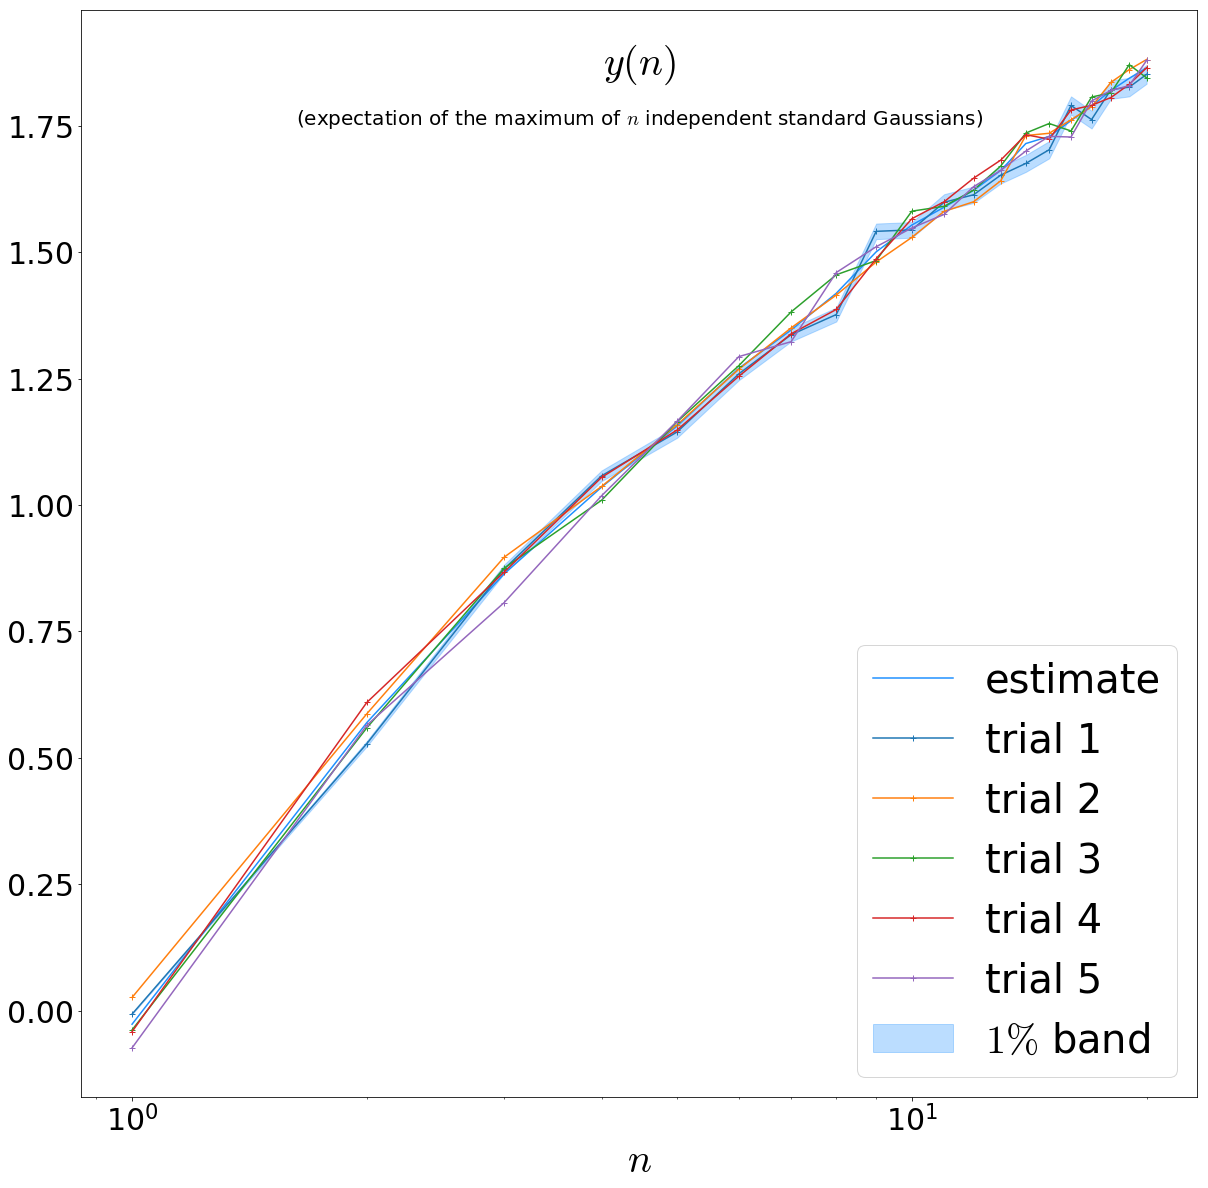

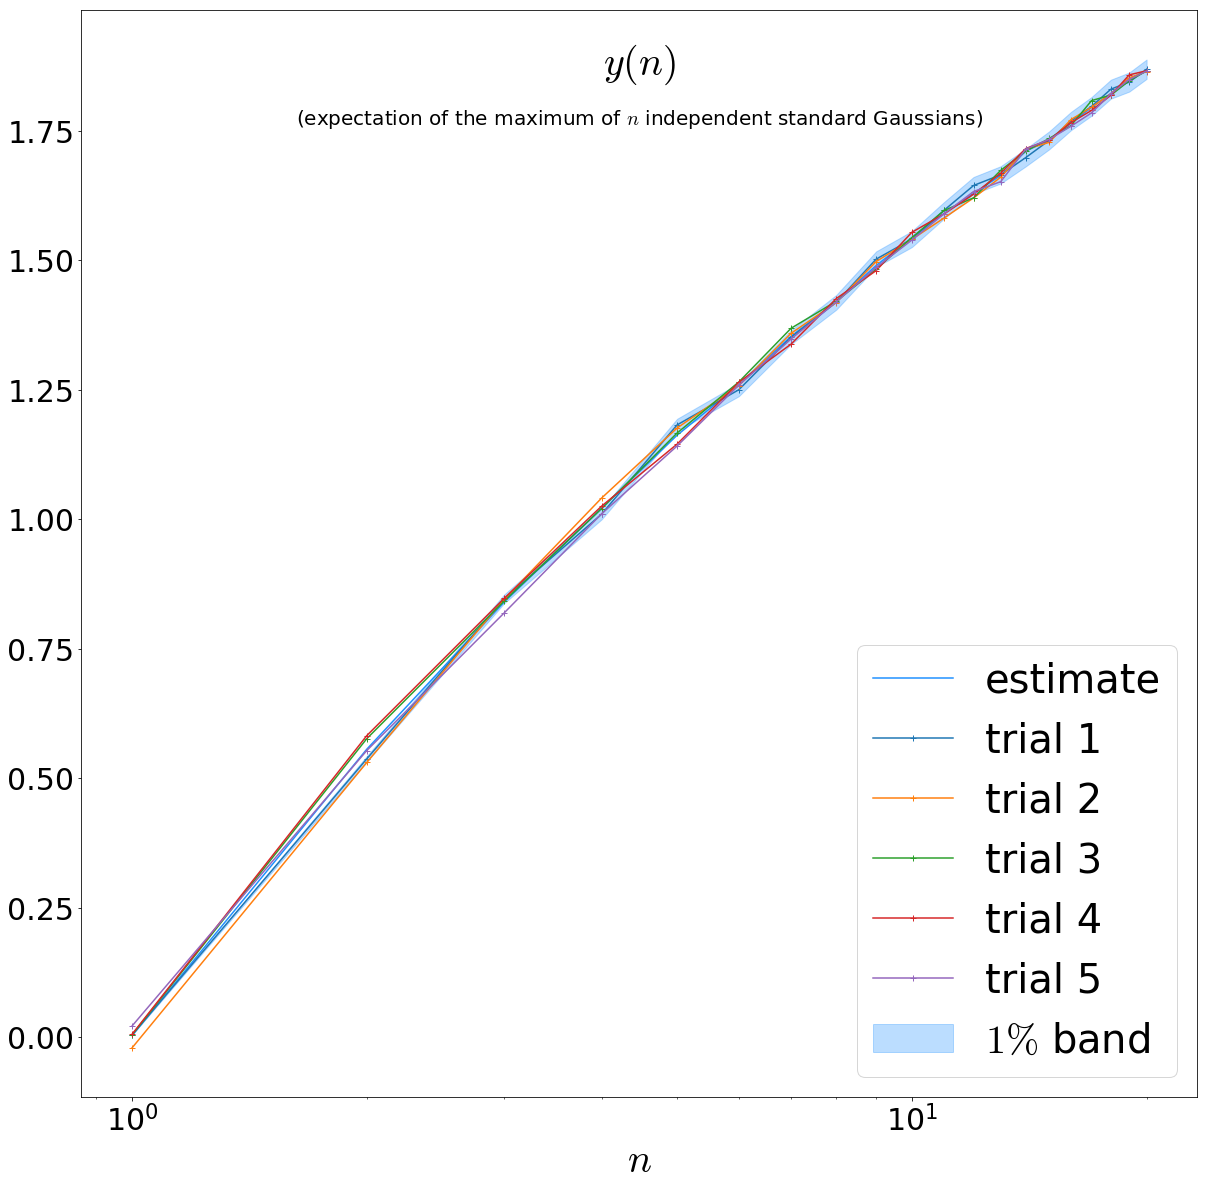

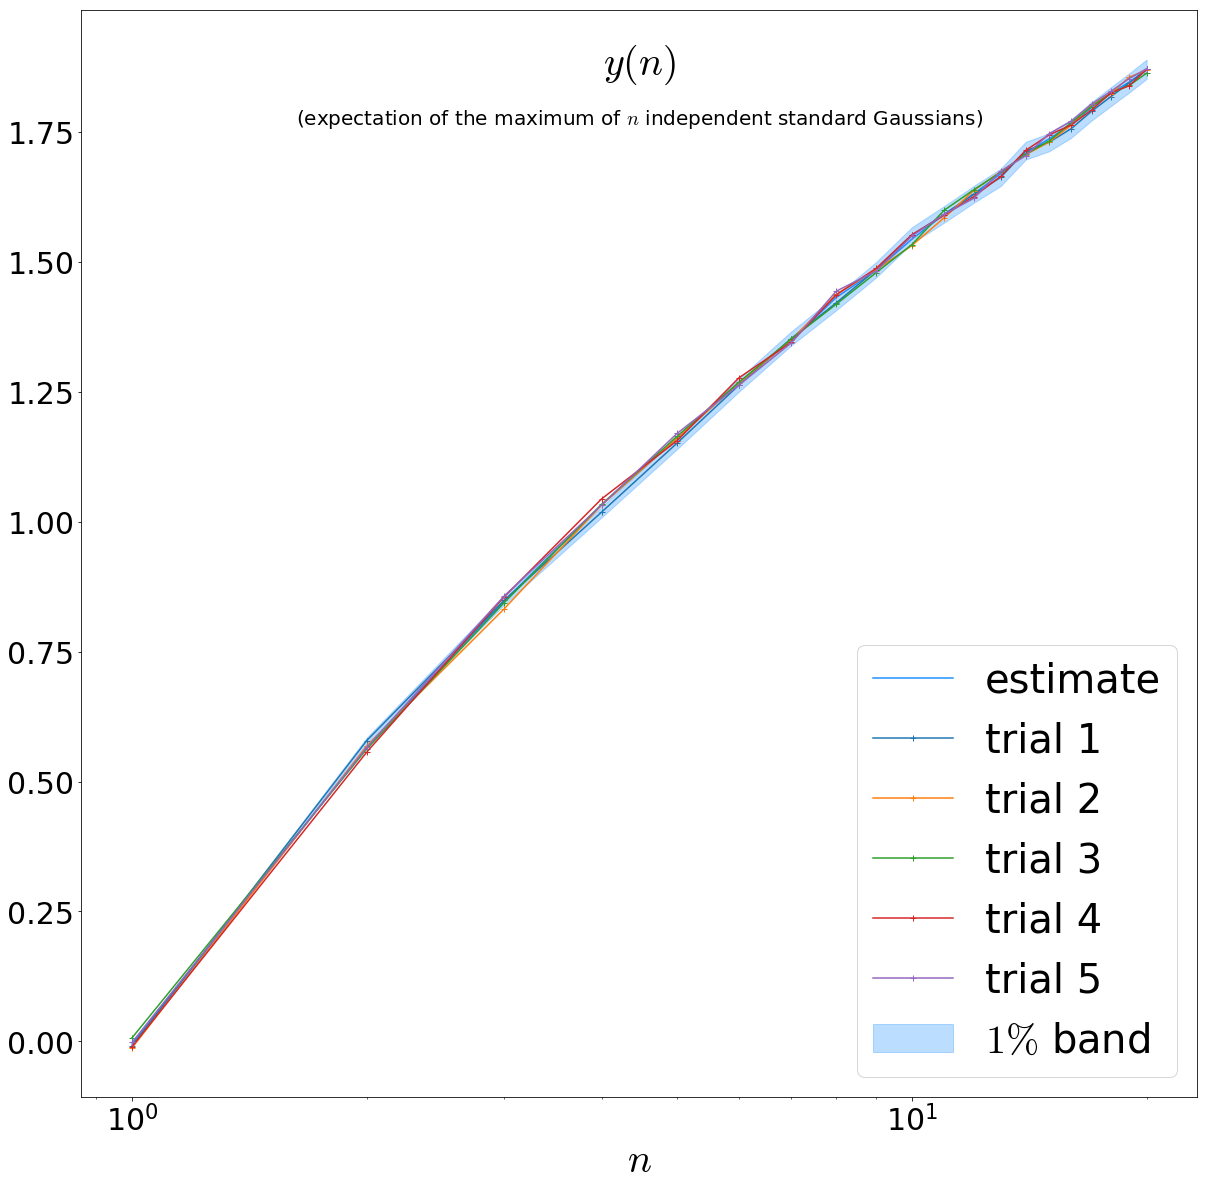

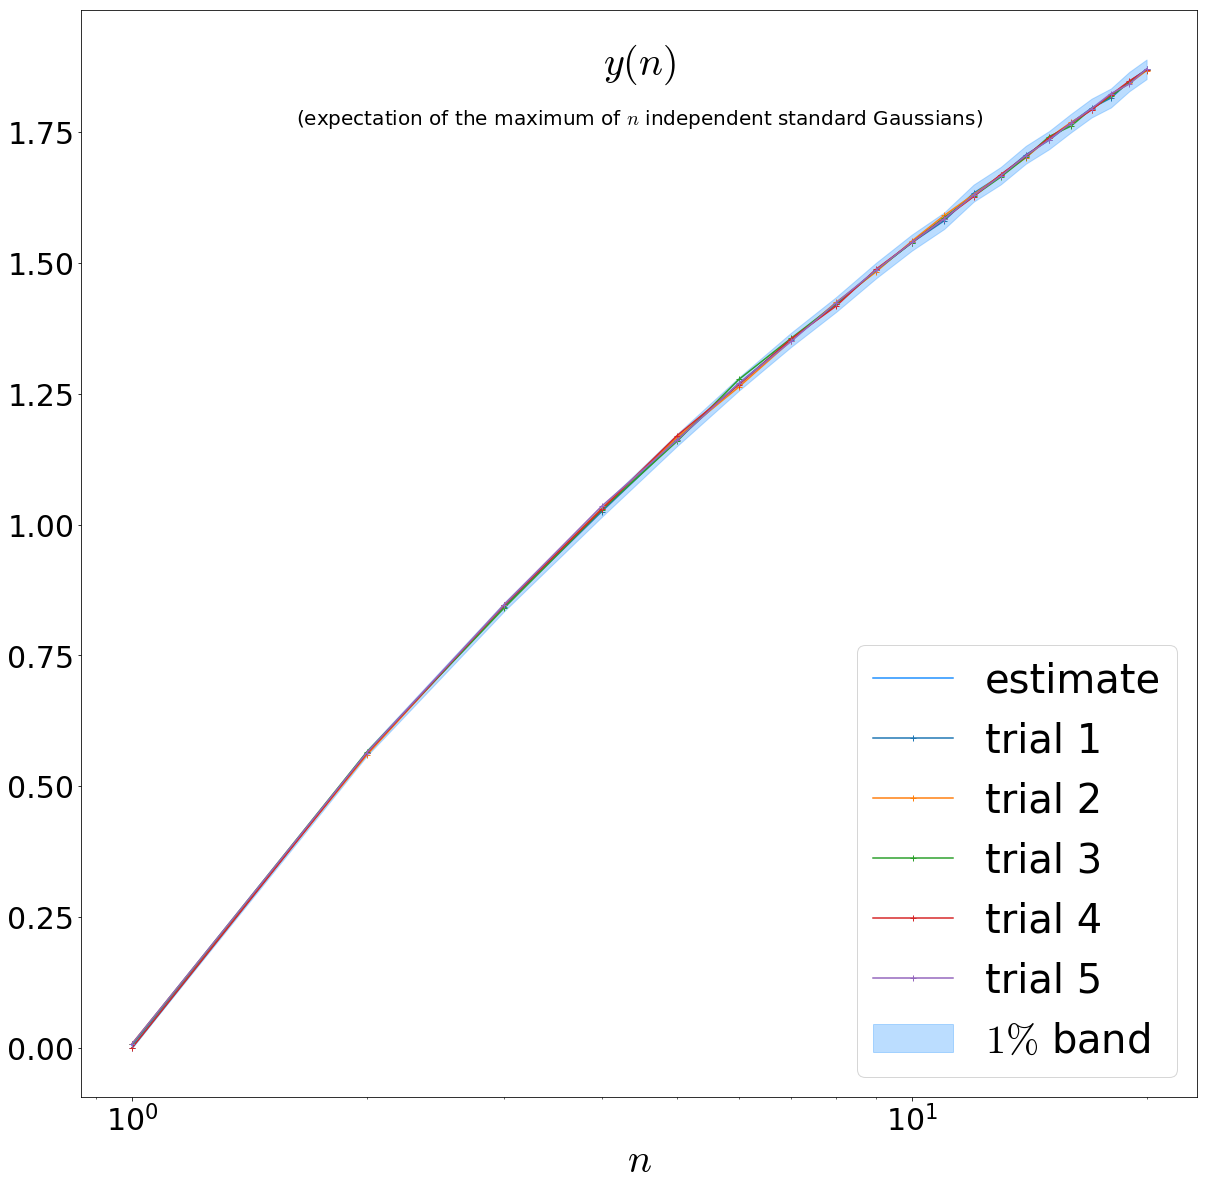

In [90]:
for n_MC in [1000, 5000, 10000, 50000]:
    x, y = simulations(n_MC = n_MC)
    fig, ax = plt.subplots(figsize = (20, 20))
    ax.set_xscale('log')
    ax.plot(x, y.mean(axis = 1), color = 'dodgerblue', label = 'estimate')
    ax.fill_between(x, y[:, 0] * .99, y[:, 0] * 1.01, color = 'dodgerblue', alpha = .3, label = r'$1\% \ band$')

    ax.plot(x, y, marker = '+', label = 'trials')
    ax.set_xlabel(r'$n$', fontsize = 40)
    ax.text(.5, .95, r'$y(n)$', fontsize = 40, transform = ax.transAxes, ha = 'center', va = 'center')
    ax.text(.5, .9,'(expectation of the maximum of $n$ independent standard Gaussians)', fontsize = 20, transform = ax.transAxes, ha = 'center', va = 'center')
    ax.tick_params(labelsize = 30)

    h, l = ax.get_legend_handles_labels()
    ax.legend(h, ['estimate'] + [f"trial {1 + k}" for k in range(n_test)] + [r'$1\%$ band'], loc = 'lower right', fontsize = 40)

    plt.savefig('max_n_gaussians_values.pdf')
    plt.show()

    

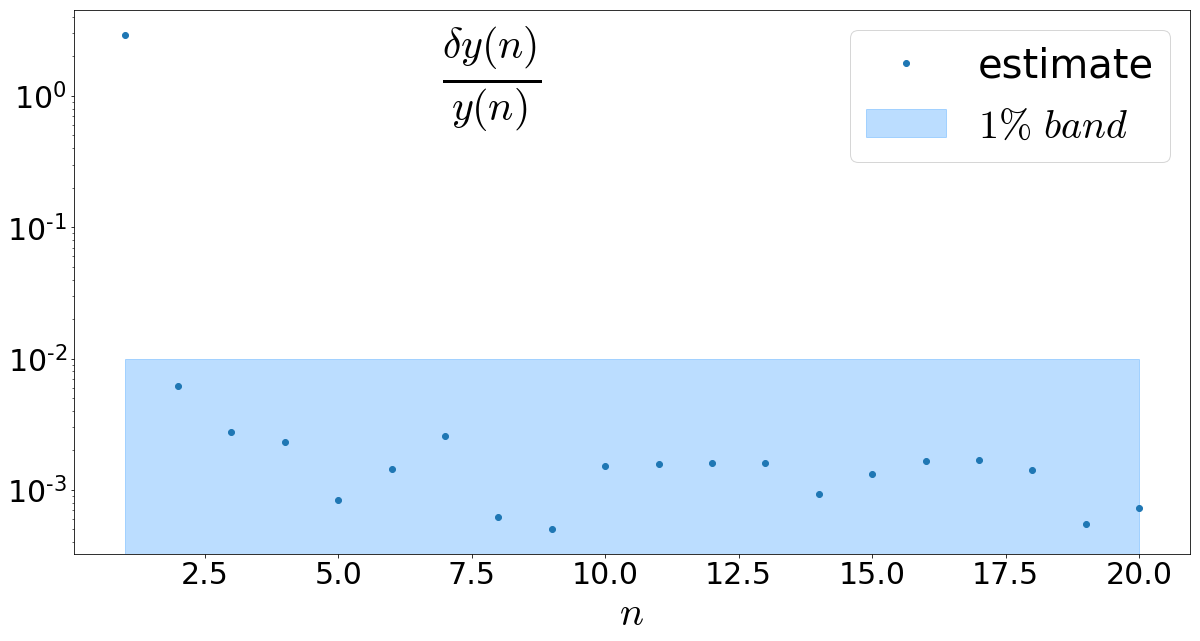

In [89]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.set_yscale('log')

ax.plot(x, np.abs(y.std(axis = 1) / y.mean(axis = 1)), 'o', label = 'estimate')
ax.fill_between(x, -1, .01, alpha = .3, color = 'dodgerblue', label = r'$1\% \ band$')

ax.set_xlabel(r'$n$', fontsize = 40)
ax.text(.33, .85, r'$\frac{\delta y(n)}{y(n)}$', fontsize = 60, transform = ax.transAxes)
ax.tick_params(labelsize = 30)

ax.legend(fontsize = 40, loc = 'upper right')
plt.savefig('max_n_gaussians_precisions.pdf')

### of course, the value at x = 1 is y = 0...